In [40]:
import numpy as np
import os
import math
import scipy.constants as pc
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import csv
import matplotlib as mpl
import matplotlib.animation as anim
from matplotlib.animation import writers

%matplotlib notebook

In [41]:
def normalize(x):
    max = 0.0
    for i in range(len(x)):
        if abs(x[i]) > max:
            max = abs(x[i])
    for i in range(len(x)):
        x[i] /= max
    return x

In [42]:
def lorentzian(Vib_Freq_axis, peak_pos, CID3, fwhm):
    ROA = [0] * len(Vib_Freq_axis)
    for i in range(0,len(Vib_Freq_axis)):
        for j in range(0,len(peak_pos)):
            ROA[i] += CID3[j]/(1+(2*(Vib_Freq_axis[i]-peak_pos[j])/fwhm)**2)
    return ROA

In [43]:
with open("Sorted.txt","r") as f:
    cmpd = []
    GFE = []
    Vib_Freq = []
    CID3 = []
    peak_pos = []
    contents = f.readlines()
    for line in contents:
        splitted_line = line.split()
        cmpd.append(int(splitted_line[0]))
        GFE.append(float(splitted_line[1]))
        Vib_Freq.append(float(splitted_line[2]))
        CID3.append(float(splitted_line[3]))

with open("Combined_Free_Energy.txt","r") as f:
    cmpd2 = []
    GFE2 = []
    content = f.readlines()
    for line in content:
        splitted_line = line.split()
        cmpd2.append(int(splitted_line[0]))
        GFE2.append(float(splitted_line[1]))

num_points = 2000
fwhm = 0.002
max_freq = max(Vib_Freq)
min_freq = min(Vib_Freq)
delta = float((max_freq-min_freq)/num_points)
Vib_Freq_axis = np.arange(min_freq,max_freq,delta)
Vib_Freq_axis_cm1 = np.zeros(len(Vib_Freq_axis))

peaks, _ = find_peaks(CID3)
for i in range(len(peaks)):
    temp = peaks[i]
    peak_pos.append(Vib_Freq[temp])
    
for i in range(0,len(Vib_Freq_axis)):
        Vib_Freq_axis_cm1[i] = Vib_Freq_axis[i]*8065.54429
    
ROA = lorentzian(Vib_Freq_axis, peak_pos, normalize(CID3), fwhm)
    

<IPython.core.display.Javascript object>


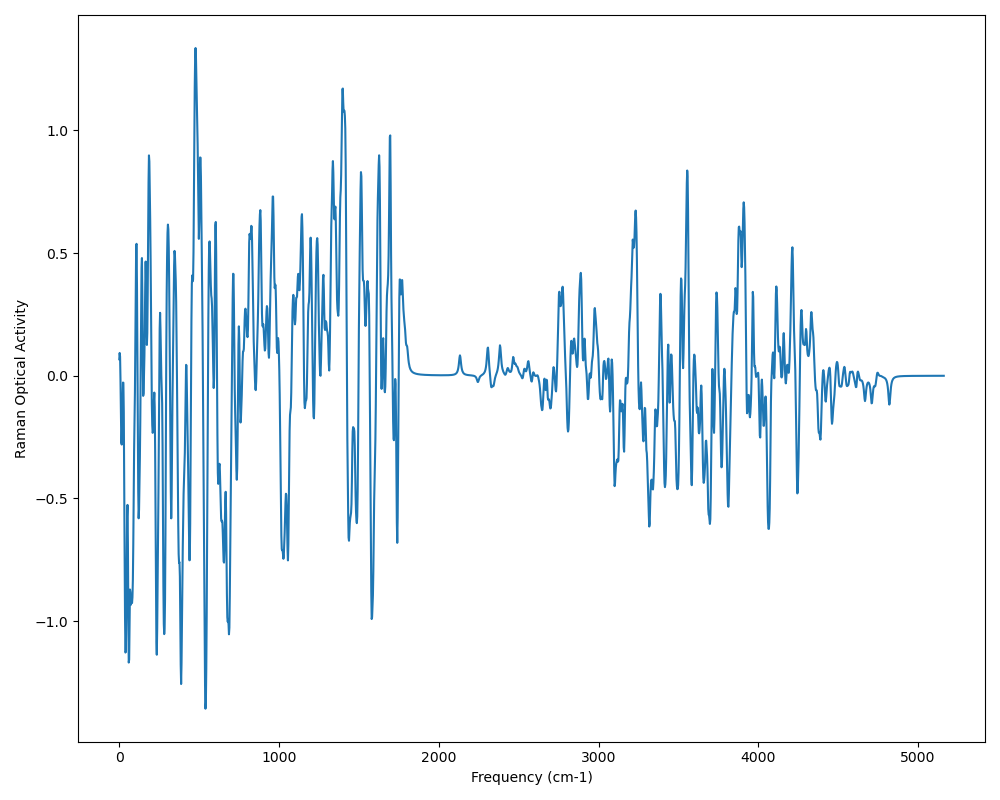

In [44]:
plt.rcParams["figure.figsize"] = [10,8]
plt.rcParams["figure.autolayout"] = True

plt.plot(Vib_Freq_axis_cm1, ROA)

plt.xlabel("Frequency (cm-1)")
plt.ylabel("Raman Optical Activity")

#plt.xlim(2500,3000)

plt.show()